In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import missingno as mso

In [4]:
data=pd.read_csv("./datasets/weatherAdaBoost.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
data.shape

(1461, 6)

<Axes: xlabel='weather', ylabel='count'>

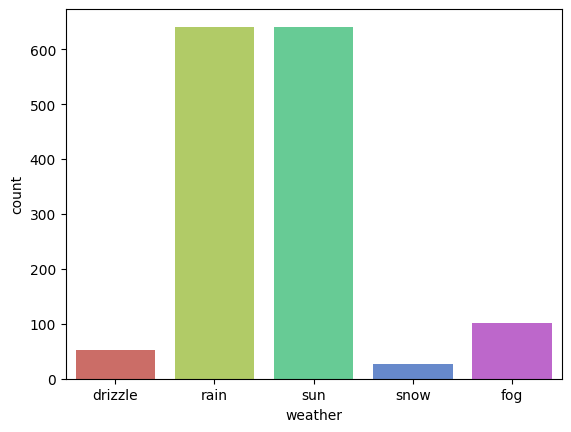

In [6]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(x="weather",data=data,palette="hls")

In [7]:
countrain=len(data[data.weather=="rain"])
countsun=len(data[data.weather=="sun"])
countdrizzle=len(data[data.weather=="drizzle"])
countsnow=len(data[data.weather=="snow"])
countfog=len(data[data.weather=="fog"])
print("Percent of Rain:{:2f}%".format((countrain/(len(data.weather))*100)))
print("Percent of Sun:{:2f}%".format((countsun/(len(data.weather))*100)))
print("Percent of Drizzle:{:2f}%".format((countdrizzle/(len(data.weather))*100)))
print("Percent of Snow:{:2f}%".format((countsnow/(len(data.weather))*100)))
print("Percent of Fog:{:2f}%".format((countfog/(len(data.weather))*100)))

Percent of Rain:43.874059%
Percent of Sun:43.805613%
Percent of Drizzle:3.627652%
Percent of Snow:1.779603%
Percent of Fog:6.913073%


In [8]:
data[["precipitation","temp_max","temp_min","wind"]].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


<Axes: xlabel='wind', ylabel='Count'>

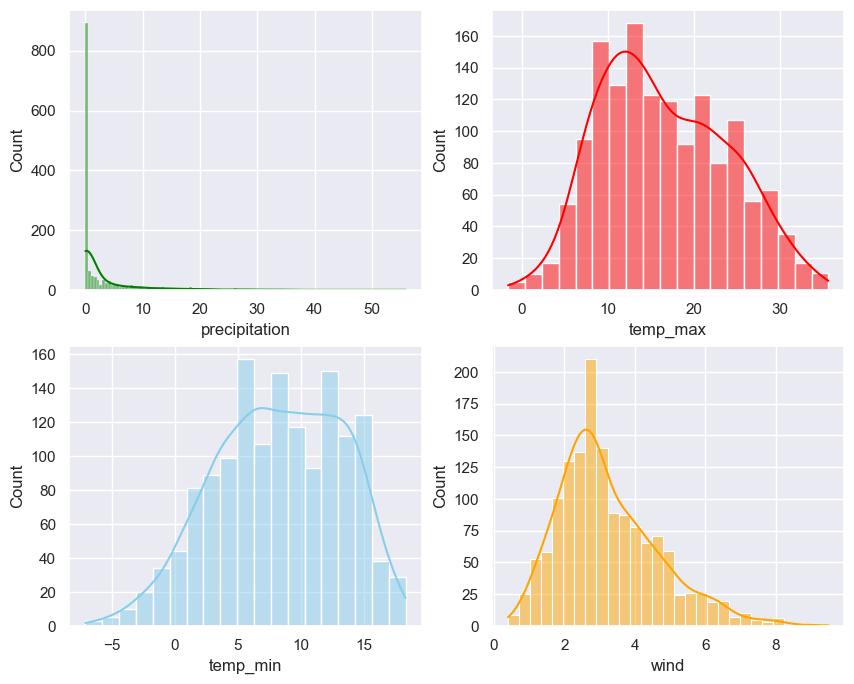

In [9]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=data,x="wind",kde=True,ax=axs[1,1],color='orange')

<Axes: xlabel='wind'>

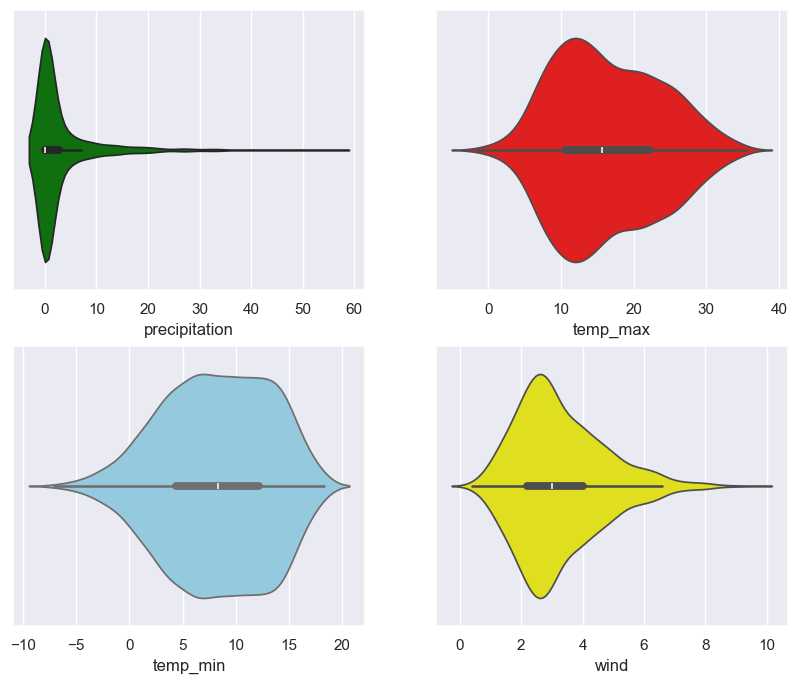

In [10]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=data,x="precipitation",ax=axs[0,0],color='green')
sns.violinplot(data=data,x="temp_max",ax=axs[0,1],color='red')
sns.violinplot(data=data,x="temp_min",ax=axs[1,0],color='skyblue')
sns.violinplot(data=data,x="wind", ax=axs[1,1],color='yellow')

<Axes: xlabel='precipitation', ylabel='weather'>

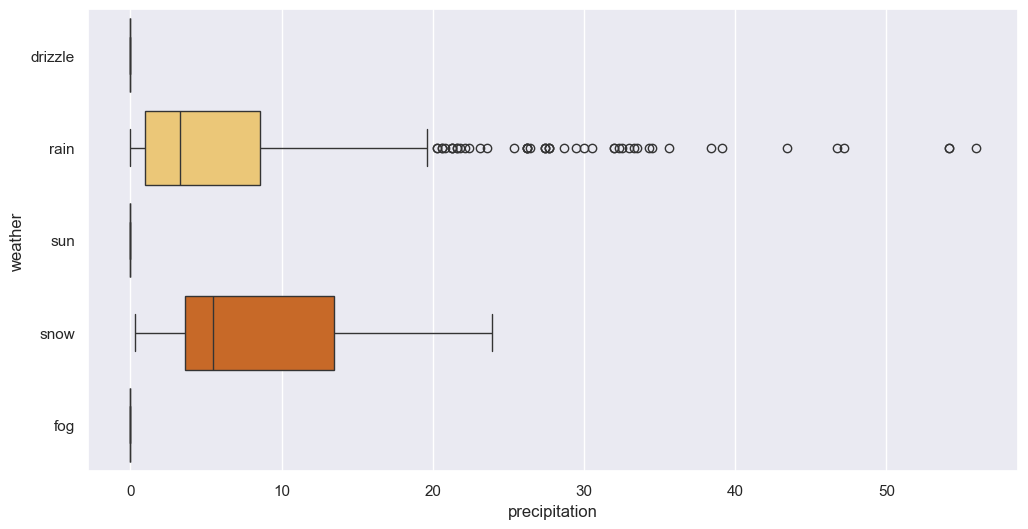

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(x="precipitation",y="weather",data=data,palette="YlOrBr")

<Axes: xlabel='temp_max', ylabel='weather'>

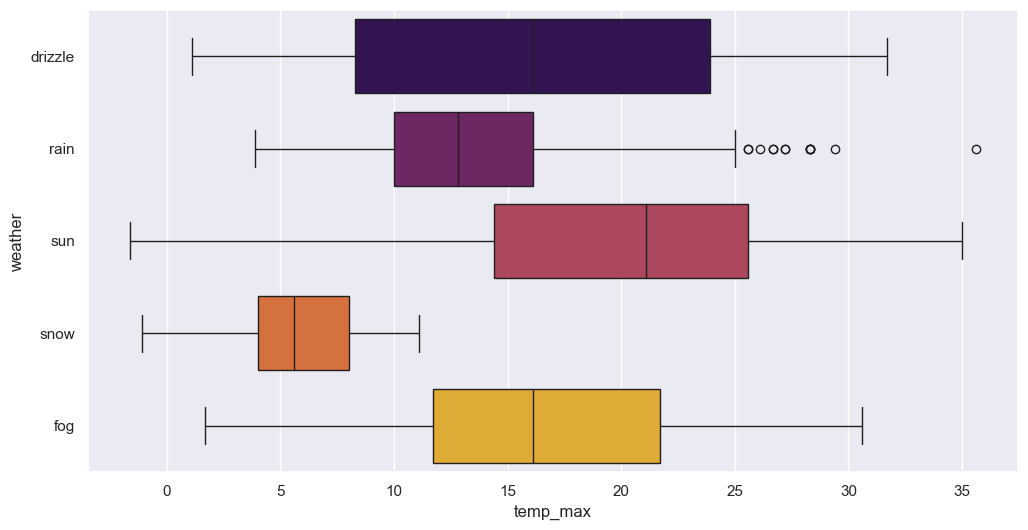

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x="temp_max",y="weather",data=data,palette="inferno")

<Axes: xlabel='wind', ylabel='weather'>

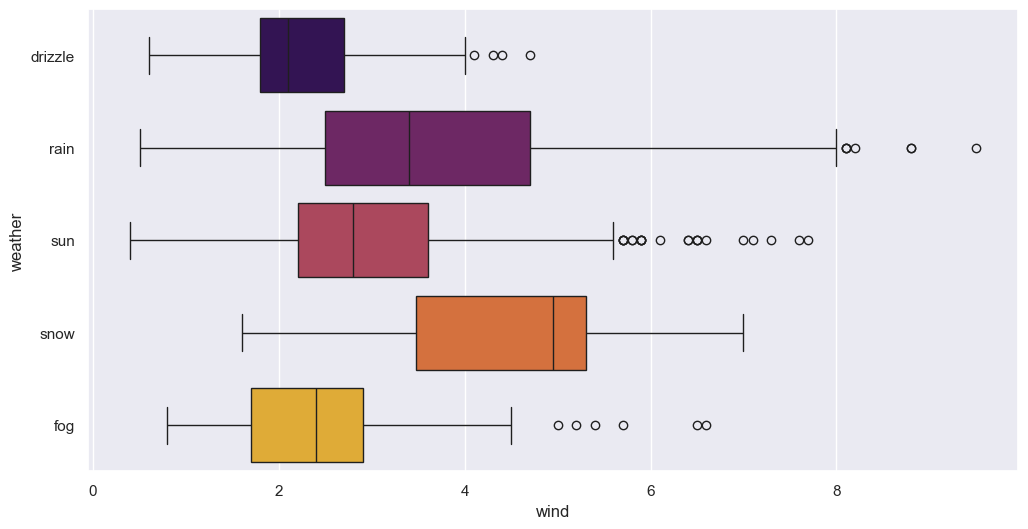

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x="wind",y="weather",data=data,palette="inferno")

<Axes: xlabel='temp_min', ylabel='weather'>

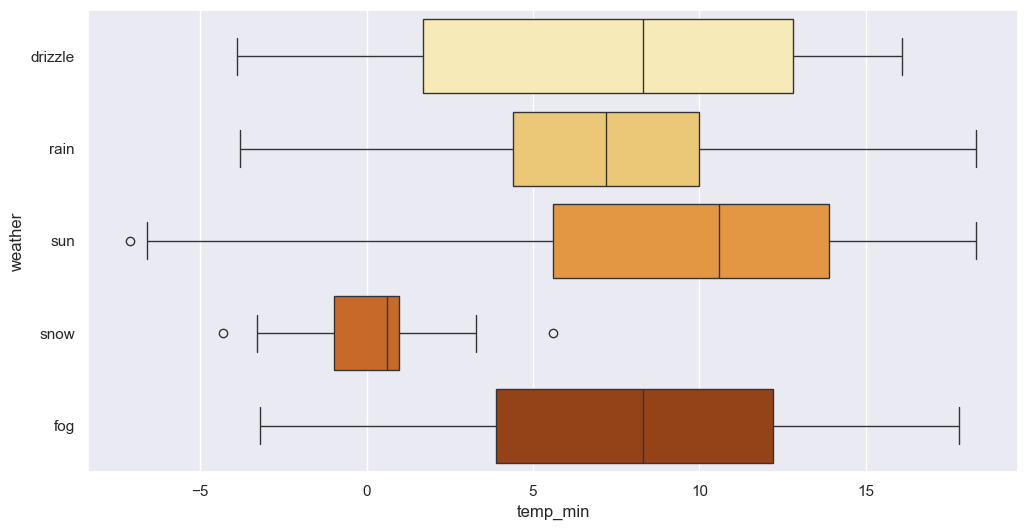

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x="temp_min",y="weather",data=data,palette="YlOrBr")

<Axes: >

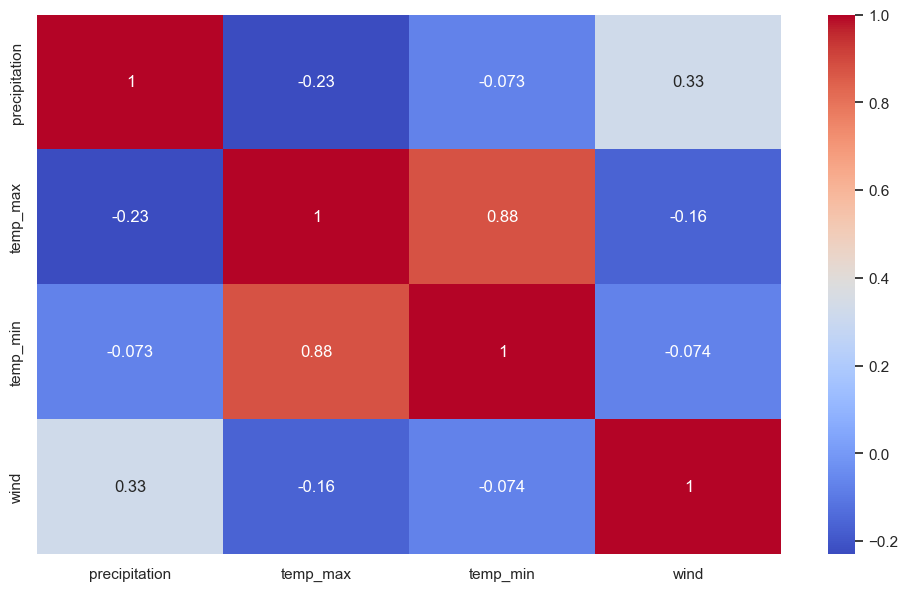

In [15]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='coolwarm')

Pearson correlation: -0.22855481643297043
T Test and P value: TtestResult(statistic=np.float64(-51.60685279531918), pvalue=np.float64(0.0), df=np.float64(2920.0))


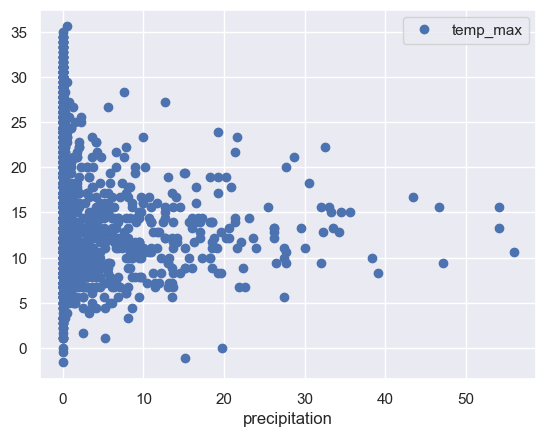

In [16]:
data.plot(x="precipitation",y="temp_max",style='o') 
print("Pearson correlation:",data["precipitation"].corr(data["temp_max"]))
print("T Test and P value:",stats.ttest_ind(data["precipitation"],data["temp_max"]))

Pearson correlation: -0.16485663487495483
T Test and P value: TtestResult(statistic=np.float64(-67.3601643301846), pvalue=np.float64(0.0), df=np.float64(2920.0))


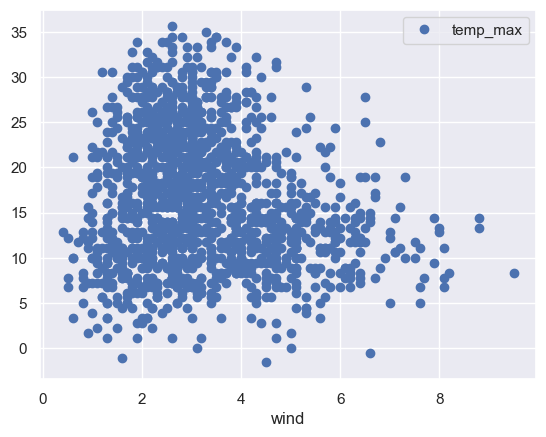

In [17]:
data.plot(x="wind",y="temp_max",style='o') 
print("Pearson correlation:",data["wind"].corr(data["temp_max"]))
print("T Test and P value:",stats.ttest_ind(data["wind"],data["temp_max"]))

<Axes: xlabel='temp_max'>

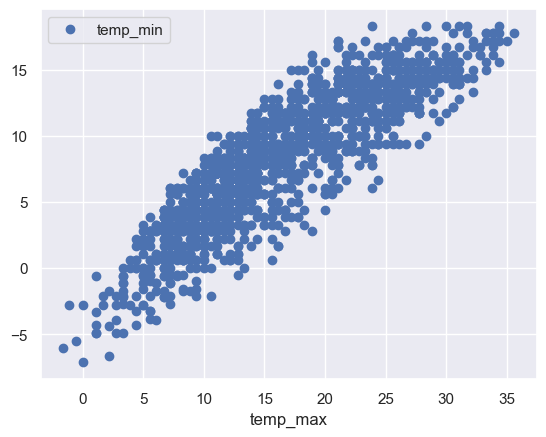

In [18]:
data.plot(x="temp_max",y="temp_min",style='o')

In [19]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

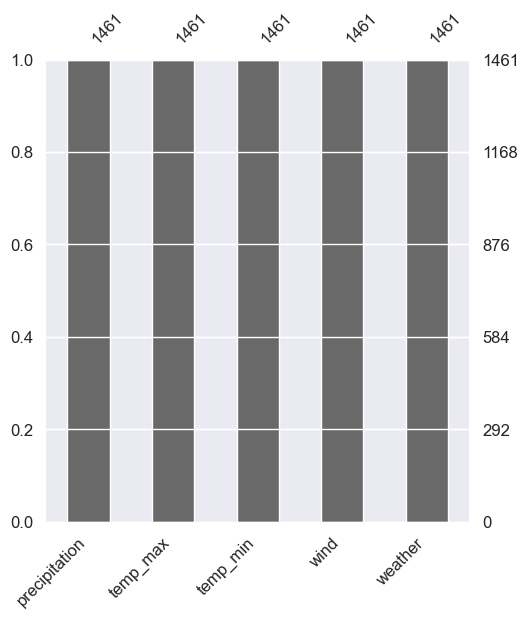

In [20]:
plt.figure(figsize=(12,6))
axz=plt.subplot(1,2,2)
mso.bar(data.drop(["date"],axis=1),ax=axz,fontsize=12);

In [31]:
df=data.drop(["date"],axis=1)

In [46]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df["weather"]=label_encoder.fit_transform(df["weather"])
#filt_df = newdf.loc[:, newdf.columns != 'weather']
df

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2
1457,1.5,5.0,1.7,1.3,2
1458,0.0,7.2,0.6,2.6,1
1459,0.0,5.6,-1.0,3.4,4


In [48]:
# Example DataFrame
#df = pd.DataFrame({
#    'A': [1, 2, 3, 4, 5, 100],
#    'B': [10, 20, 30, 40, 50, 200]
#})

# Calculate Q1, Q3, and IQR for each column
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Create bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Check for outliers
# Ensure alignment by performing operations with DataFrame `df` and Series `lower_bound`, `upper_bound`
outlier_condition = ~((df < lower_bound) | (df > upper_bound))

# Apply the condition to filter out rows with any outliers
df = df[outlier_condition.all(axis=1)]

print(df)

      precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7        0
2               0.8      11.7       7.2   2.3        2
4               1.3       8.9       2.8   6.1        2
5               2.5       4.4       2.2   2.2        2
6               0.0       7.2       2.8   2.3        2
...             ...       ...       ...   ...      ...
1455            0.0       4.4       0.0   2.5        4
1457            1.5       5.0       1.7   1.3        2
1458            0.0       7.2       0.6   2.6        1
1459            0.0       5.6      -1.0   3.4        4
1460            0.0       5.6      -2.1   3.5        4

[1233 rows x 5 columns]


In [49]:
df.precipitation=np.sqrt(df.precipitation)
df.wind=np.sqrt(df.wind)

<Axes: xlabel='wind', ylabel='Count'>

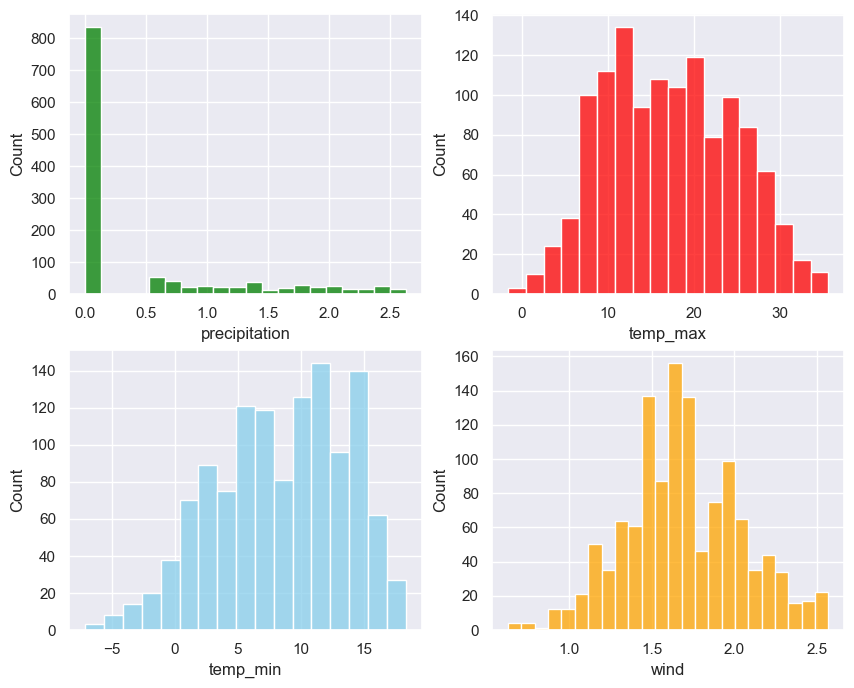

In [50]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=df,x="precipitation",ax=axs[0,0],color='green')
sns.histplot(data=df,x="temp_max",ax=axs[0,1],color='red')
sns.histplot(data=df,x="temp_min",ax=axs[1,0],color='skyblue')
sns.histplot(data=df,x="wind",ax=axs[1,1],color='orange')

In [51]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,0
2,0.894427,11.7,7.2,1.516575,2
4,1.140175,8.9,2.8,2.469818,2
5,1.581139,4.4,2.2,1.483240,2
6,0.000000,7.2,2.8,1.516575,2


In [52]:
x=((df.loc[:,df.columns!="weather"]).astype(int)).values[:,0:]
y=df["weather"].values

In [53]:
df.weather.unique()

array([0, 2, 4, 3, 1])

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [56]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.21774193548387097


In [60]:

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6129032258064516
